# 0. 라이브러리 및 데이터 Load 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_csv('train.csv')
df[:5]

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN


# 1. EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  890981 non-null   float64
 4   Estimated_Arrival_Time    890960 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State              890985 non-null   object 
 10  Destination_Airport       1000000 non-null  object 
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State         890921 non-null   object 
 13  Distance                  10

In [5]:
print('-- 컬럼별 결측치의 수 --')
print(df.isnull().sum()[df.isnull().sum() > 0])
print('\n-- 컬럼별 결측치 비율 --')
print(round((df.isnull().sum()[df.isnull().sum() > 0]) / df.shape[0] * 100, 2))
# 타겟 컬럼인 Delay의 결측치 비율이 74.5 %

-- 컬럼별 결측치의 수 --
Estimated_Departure_Time    109019
Estimated_Arrival_Time      109040
Origin_State                109015
Destination_State           109079
Airline                     108920
Carrier_Code(IATA)          108990
Carrier_ID(DOT)             108997
Delay                       744999
dtype: int64

-- 컬럼별 결측치 비율 --
Estimated_Departure_Time    10.90
Estimated_Arrival_Time      10.90
Origin_State                10.90
Destination_State           10.91
Airline                     10.89
Carrier_Code(IATA)          10.90
Carrier_ID(DOT)             10.90
Delay                       74.50
dtype: float64


<Axes: >

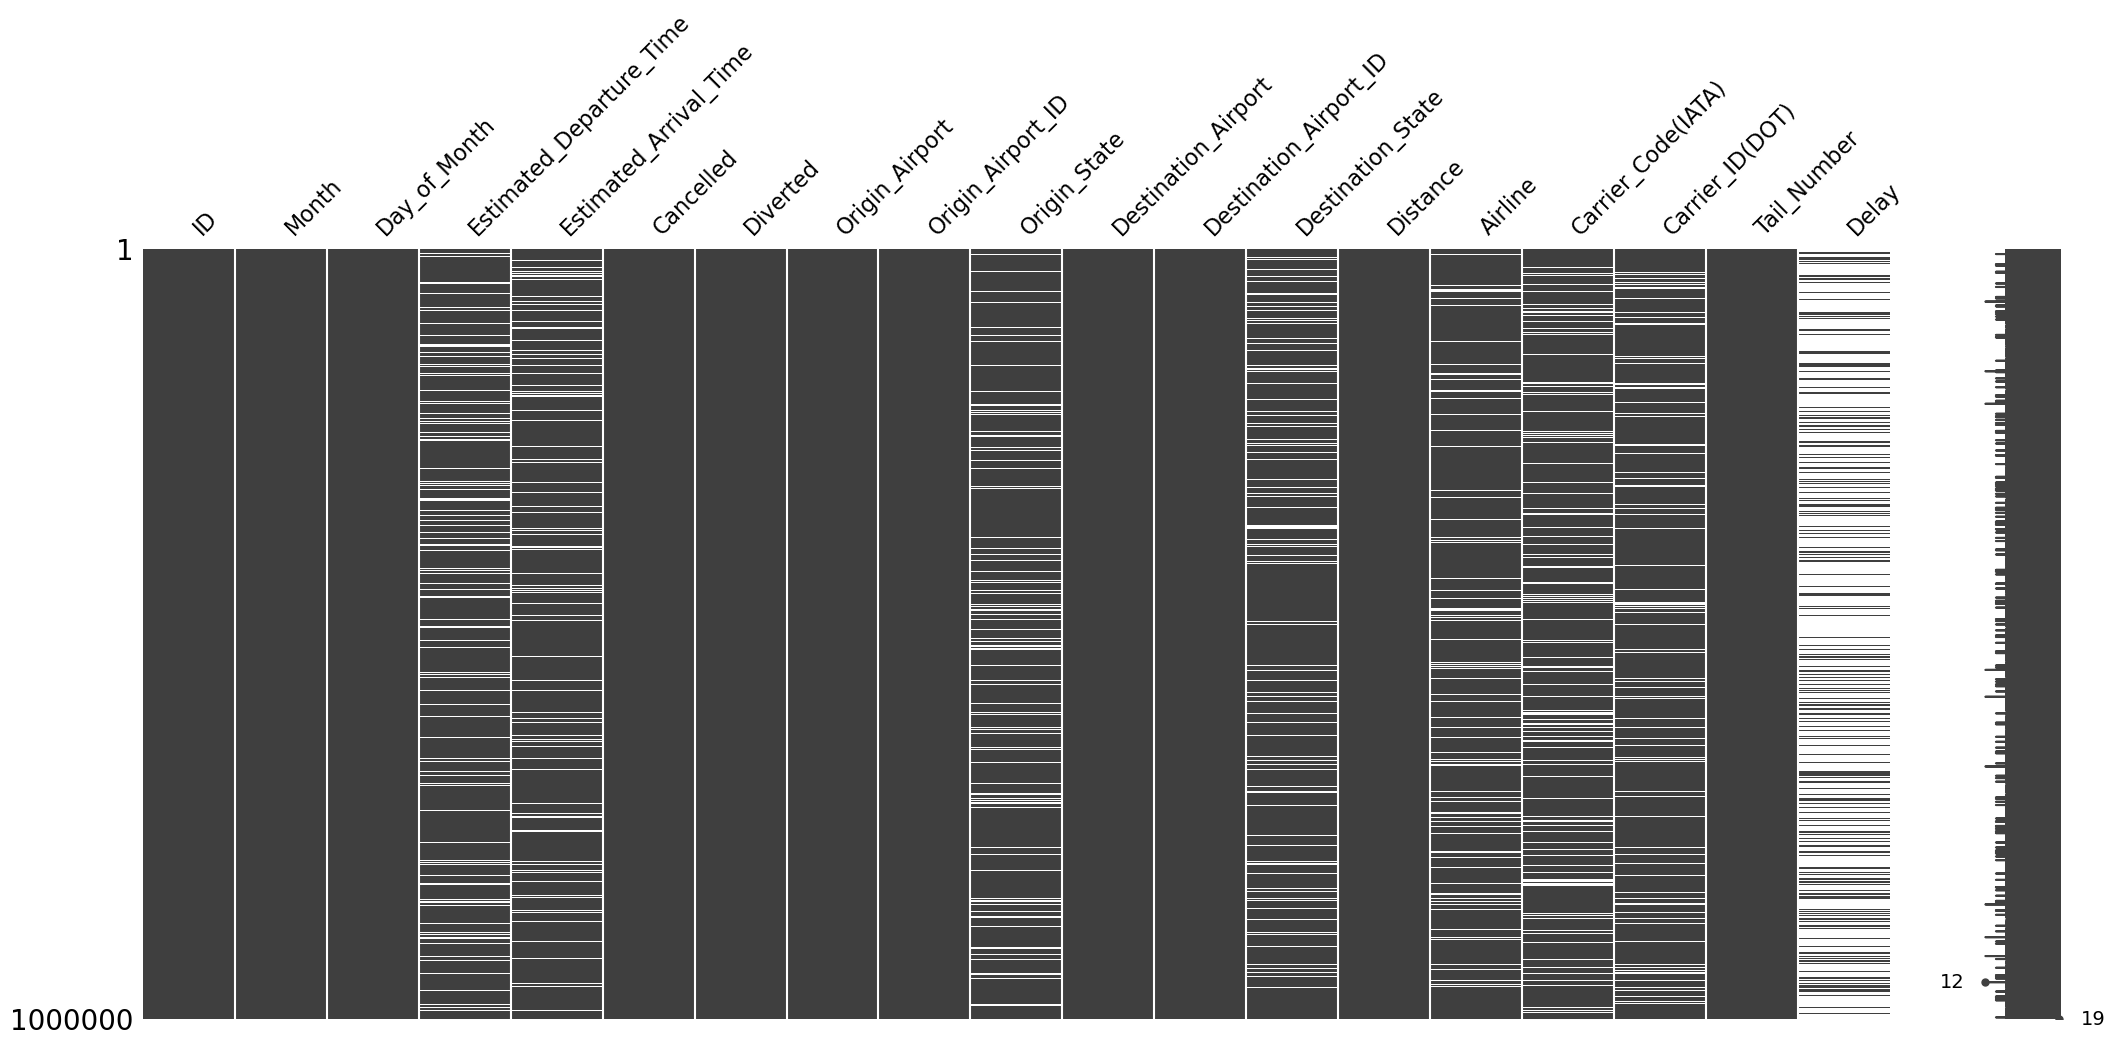

In [6]:
# 결측치 간 분포 확인
msno.matrix(df)
# 출발 시간 및 도착 시간의 결측치가 겹치지 않는 부분이 많은 것을 확인할 수 있음

In [7]:
# O : 'Origin_Airport', 'Origin_State', 'Destination_Airport',
#        'Destination_State', 'Airline', 'Carrier_Code(IATA)', 'Tail_Number',
#        'Delay'
# N : 'Month', 'Day_of_Month', 'Estimated_Departure_Time',
#        'Estimated_Arrival_Time', 'Cancelled', 'Diverted', 'Origin_Airport_ID',
#        'Destination_Airport_ID', 'Distance', 'Carrier_ID(DOT)'

In [6]:
df['Delay'].value_counts(normalize=True)

Not_Delayed    0.82353
Delayed        0.17647
Name: Delay, dtype: float64

<Axes: xlabel='Delay', ylabel='count'>

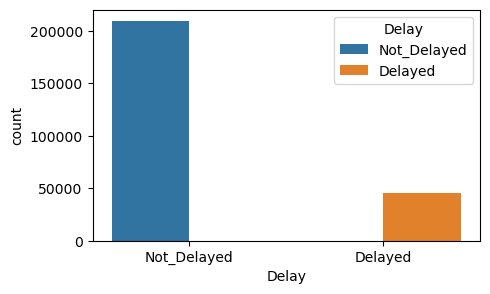

In [9]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='Delay', hue='Delay')

## 범주형 변수

## 1.1. Origin_Airport, Destination_Airport
- IATA 코드에 따른 고유값의 수와 US DOT에 따른 고유값의 수가 같기 때문에 IATA 코드만 사용

In [8]:
# Origin_Airport & Origin_Airport_ID
df['Origin_Airport_ID'].nunique(), df['Origin_Airport'].nunique()
# 374개의 출발 공항 

(374, 374)

In [9]:
# Destination_Airport & Destination_Airport_ID
df['Destination_Airport_ID'].nunique(), df['Destination_Airport'].nunique()
# 375개의 도착 공항

(375, 375)

In [10]:
print(set(df['Destination_Airport'].unique()) - set(df['Origin_Airport'].unique()))
print(set(df['Origin_Airport'].unique()) - set(df['Destination_Airport'].unique()))

{'YNG'}
set()


In [11]:
df['Origin_Airport'].value_counts().sort_values(ascending=False)[:30]

ORD    50436
ATL    44140
DEN    40300
LAX    31825
DFW    30879
CLT    26078
IAH    25483
SFO    24927
EWR    23670
SEA    23588
LAS    23306
PHX    21614
BOS    19936
MCO    19571
DTW    19428
LGA    19237
MSP    17908
PHL    16763
DCA    16135
JFK    15657
BWI    15218
FLL    13864
SLC    13543
IAD    13115
SAN    13104
MDW    12851
PDX    11164
DAL    10833
BNA    10518
TPA    10151
Name: Origin_Airport, dtype: int64

In [12]:
df['Destination_Airport'].value_counts().sort_values(ascending=False)[:30]

ORD    50171
ATL    43626
DEN    39693
LAX    31936
DFW    30183
SFO    25354
CLT    25343
IAH    25267
EWR    23756
SEA    23643
LAS    23359
PHX    21404
BOS    19950
DTW    19496
LGA    19460
MCO    19215
MSP    17918
PHL    16769
DCA    16168
JFK    15561
BWI    14992
FLL    14202
SLC    13632
SAN    13151
IAD    13129
MDW    12444
PDX    11287
DAL    10600
BNA    10523
TPA    10281
Name: Destination_Airport, dtype: int64

In [13]:
df[df['Destination_Airport'] == 'YNG']['Destination_Airport'].value_counts()

YNG    1
Name: Destination_Airport, dtype: int64

In [14]:
df[df['Destination_Airport'] == 'YNG']

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
126925,TRAIN_126925,1,1,1500.0,1717.0,0,0,SFB,14761,Florida,YNG,16133,NaN,861.0,Allegiant Air,G4,20368.0,402NV,NaN


#### 타겟값과의 관계 확인

In [15]:
# Origin_Airport에 따른 Delay의 분포
crosstab = pd.crosstab(df['Origin_Airport'], df['Delay'])
crosstab['CNT'] = crosstab['Delayed'] + crosstab['Not_Delayed']
crosstab['Delayed_Rate'] = np.round(crosstab['Delayed'] / crosstab['CNT'] * 100, 2)

# 지연율 표준편차 확인
print('지연율 표준편차 : {}'.format(crosstab['Delayed_Rate'].std()))

# 지연율 top30 공항의 지연율 및 총 횟수 
crosstab[['Delayed_Rate', 'CNT']].sort_values(by='Delayed_Rate', ascending=False)[:30]

# 지연율이 높은 특정 공항이 있는 것으로 확인된다  

지연율 표준편차 : 7.8404799438662245


Delay,Delayed_Rate,CNT
Origin_Airport,,
OTH,60.00,10
OGD,60.00,5
OGS,50.00,10
HGR,50.00,2
PPG,50.00,2
MMH,46.67,15
XWA,42.86,7
SCK,36.11,36
GST,33.33,3


In [16]:
# Destination_Airport에 따른 Delay의 분포
crosstab = pd.crosstab(df['Destination_Airport'], df['Delay'])
crosstab['CNT'] = crosstab['Delayed'] + crosstab['Not_Delayed']
crosstab['Delayed_Rate'] = np.round(crosstab['Delayed'] / crosstab['CNT'] * 100, 2)

# 지연율 표준편차 확인
print('지연율 표준편차 : {}'.format(crosstab['Delayed_Rate'].std()))

# 지연율 top30 공항의 지연율 및 총 횟수 
crosstab[['Delayed_Rate', 'CNT']].sort_values(by='Delayed_Rate', ascending=False)[:30]

지연율 표준편차 : 6.475165216390215


Delay,Delayed_Rate,CNT
Destination_Airport,,
DUT,41.18,17
DIK,37.04,27
BLV,36.36,33
SCK,35.71,28
PQI,33.33,18
OWB,33.33,6
PPG,33.33,3
ALW,32.00,25
GUC,32.00,25


## 1.2. Origin_State, Destination_State

In [17]:
df['Origin_State'].nunique(), df['Destination_State'].nunique()

(52, 52)

In [18]:
o_state = set(df['Origin_State'].unique())
d_state = set(df['Destination_State'].unique())

In [19]:
print(o_state - d_state)
print(d_state - o_state)

set()
set()


<Axes: xlabel='Destination_State', ylabel='count'>

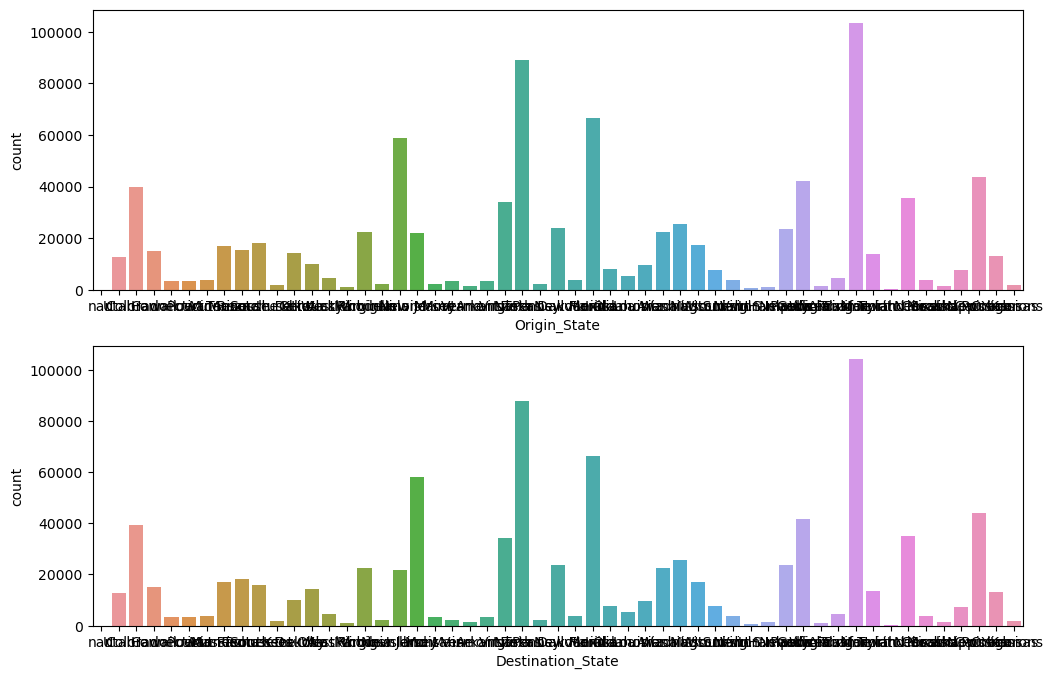

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
sns.countplot(data=df, x='Origin_State', ax=ax[0], order=o_state)
sns.countplot(data=df, x='Destination_State', ax=ax[1], order=d_state)

#### 타겟값과의 관계 확인

In [21]:
# Origin_State 따른 Delay의 분포
crosstab = pd.crosstab(df['Origin_State'], df['Delay'])
crosstab['CNT'] = crosstab['Delayed'] + crosstab['Not_Delayed']
crosstab['Delayed_Rate'] = np.round(crosstab['Delayed'] / crosstab['CNT'] * 100, 2)

# 지연율 표준편차 확인
print('지연율 표준편차 : {}'.format(crosstab['Delayed_Rate'].std()))

# 지연율 top30 주의 지연율 및 총 횟수 
crosstab[['Delayed_Rate', 'CNT']].sort_values(by='Delayed_Rate', ascending=False)[:30]

지연율 표준편차 : 3.1905106933158676


Delay,Delayed_Rate,CNT
Origin_State,,
New Jersey,24.88,5176
Illinois,21.92,14310
Vermont,20.39,304
Massachusetts,20.32,4577
New York,20.30,11100
Puerto Rico,20.13,919
Colorado,19.89,9938
Maryland,19.24,3509
Texas,18.60,22752


In [22]:
# Destination_State 따른 Delay의 분포
crosstab = pd.crosstab(df['Destination_State'], df['Delay'])
crosstab['CNT'] = crosstab['Delayed'] + crosstab['Not_Delayed']
crosstab['Delayed_Rate'] = np.round(crosstab['Delayed'] / crosstab['CNT'] * 100, 2)

# 지연율 표준편차 확인
print('지연율 표준편차 : {}'.format(crosstab['Delayed_Rate'].std()))

# 지연율 top30 주의 지연율 및 총 횟수 
crosstab[['Delayed_Rate', 'CNT']].sort_values(by='Delayed_Rate', ascending=False)[:30]

지연율 표준편차 : 3.044928497527124


Delay,Delayed_Rate,CNT
Destination_State,,
New Jersey,28.24,5145
Puerto Rico,23.17,876
West Virginia,23.08,234
Maine,22.02,563
New York,21.61,11079
Massachusetts,21.49,4524
Rhode Island,20.55,584
Connecticut,19.61,872
Vermont,19.39,330


## 1.3. Airline

In [23]:
df['Airline'].nunique()

28

<Axes: xlabel='Airline', ylabel='count'>

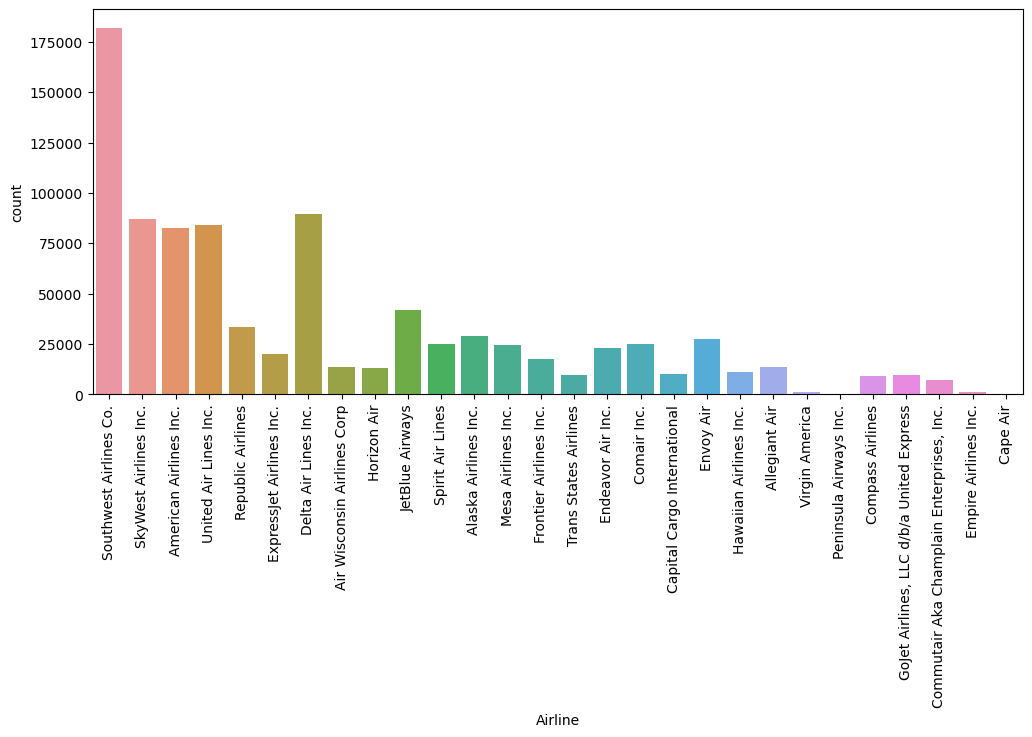

In [24]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.countplot(data=df, x='Airline')

#### 타겟값과의 관계 확인

In [25]:
# Airline 따른 Delay의 분포
crosstab = pd.crosstab(df['Airline'], df['Delay'])
crosstab['CNT'] = crosstab['Delayed'] + crosstab['Not_Delayed']
crosstab['Delayed_Rate'] = np.round(crosstab['Delayed'] / crosstab['CNT'] * 100, 2)

# 지연율 표준편차 확인
print('지연율 표준편차 : {}'.format(crosstab['Delayed_Rate'].std()))

# 지연율 top30 항공사별 지연율 및 총 횟수 
crosstab[['Delayed_Rate', 'CNT']].sort_values(by='Delayed_Rate', ascending=False)[:30]

지연율 표준편차 : 4.961158378878613


Delay,Delayed_Rate,CNT
Airline,,
Peninsula Airways Inc.,32.14,28
"Commutair Aka Champlain Enterprises, Inc.",28.47,1630
Frontier Airlines Inc.,25.45,4255
JetBlue Airways,24.34,10186
Trans States Airlines,21.99,2315
ExpressJet Airlines Inc.,19.68,5077
Allegiant Air,19.31,3434
Virgin America,19.14,350
American Airlines Inc.,18.83,20870


## 1.4. Carrier_Code

In [26]:
df['Carrier_Code(IATA)'].nunique()

11

In [27]:
df.groupby('Carrier_Code(IATA)')['Airline'].nunique()

Carrier_Code(IATA)
AA    10
AS     4
B6     1
DL     7
F9     1
G4     1
HA     2
NK     1
UA    10
VX     1
WN     1
Name: Airline, dtype: int64

In [28]:
# Carrier_Code(IATA) 따른 Delay의 분포
crosstab = pd.crosstab(df['Carrier_Code(IATA)'], df['Delay'])
crosstab['CNT'] = crosstab['Delayed'] + crosstab['Not_Delayed']
crosstab['Delayed_Rate'] = np.round(crosstab['Delayed'] / crosstab['CNT'] * 100, 2)

# 지연율 표준편차 확인
print('지연율 표준편차 : {}'.format(crosstab['Delayed_Rate'].std()))

# 지연율 top30 Carrier_Code(IATA)별 지연율 및 총 횟수 
crosstab[['Delayed_Rate', 'CNT']].sort_values(by='Delayed_Rate', ascending=False)[:30]

지연율 표준편차 : 4.512304994527339


Delay,Delayed_Rate,CNT
Carrier_Code(IATA),,
F9,25.39,4277
B6,24.34,10111
G4,19.07,3471
WN,18.77,46156
UA,18.45,52112
VX,17.97,345
AA,17.76,46060
NK,16.40,6463
AS,14.62,12685


## 1.5. Carrier_ID(DOT)

In [29]:
df['Carrier_ID(DOT)'].nunique()

28

In [30]:
df.groupby(['Carrier_ID(DOT)'])['Airline'].nunique()
# Airline과 1 : 1 매칭이 되기 때문에 컬럼 삭제 예정

Carrier_ID(DOT)
19393.0    1
19687.0    1
19690.0    1
19790.0    1
19805.0    1
19930.0    1
19977.0    1
20046.0    1
20225.0    1
20237.0    1
20253.0    1
20263.0    1
20304.0    1
20363.0    1
20366.0    1
20368.0    1
20378.0    1
20397.0    1
20398.0    1
20409.0    1
20416.0    1
20427.0    1
20436.0    1
20445.0    1
20452.0    1
20500.0    1
21167.0    1
21171.0    1
Name: Airline, dtype: int64

## 1.6. Tail_Number 

In [31]:
df['Tail_Number'].nunique()

6430

In [32]:
# Tail_Number 따른 Delay의 분포
crosstab = pd.crosstab(df['Tail_Number'], df['Delay'])
crosstab['CNT'] = crosstab['Delayed'] + crosstab['Not_Delayed']
crosstab['Delayed_Rate'] = np.round(crosstab['Delayed'] / crosstab['CNT'] * 100, 2)

# 지연율 표준편차 확인
print('지연율 표준편차 : {}'.format(crosstab['Delayed_Rate'].std()))

# 지연율 top30 항공기별 지연율 및 총 횟수 
crosstab[['Delayed_Rate', 'CNT']].sort_values(by='Delayed_Rate', ascending=False)[:30]

지연율 표준편차 : 11.211251287196072


Delay,Delayed_Rate,CNT
Tail_Number,,
N287NN,100.0,1
N2038J,100.0,1
N823AN,100.0,1
N752AN,100.0,1
N45905,100.0,1
N77014,100.0,1
N2341U,100.0,1
N651UA,100.0,3
N13954,100.0,1


In [33]:
crosstab[['Delayed_Rate', 'CNT']].sort_values(by='CNT', ascending=False)[:30]

Delay,Delayed_Rate,CNT
Tail_Number,,
N476HA,4.73,148
N483HA,6.08,148
N490HA,3.40,147
N485HA,4.14,145
N491HA,3.55,141
N477HA,2.17,138
N480HA,2.92,137
N495HA,6.62,136
N487HA,9.70,134


In [34]:
# 항공사별 항공기 수
df.groupby('Airline')['Tail_Number'].nunique().sort_values(ascending=False)

Airline
American Airlines Inc.                       988
Delta Air Lines Inc.                         969
United Air Lines Inc.                        773
Southwest Airlines Co.                       754
SkyWest Airlines Inc.                        506
JetBlue Airways                              301
Alaska Airlines Inc.                         236
ExpressJet Airlines Inc.                     212
Envoy Air                                    206
Republic Airlines                            202
Endeavor Air Inc.                            167
Comair Inc.                                  163
Mesa Airlines Inc.                           145
Spirit Air Lines                             144
Allegiant Air                                128
Frontier Airlines Inc.                       114
Horizon Air                                   81
GoJet Airlines, LLC d/b/a United Express      72
Hawaiian Airlines Inc.                        69
Virgin America                                68
Air Wisconsi

## 1.7. Month

<Axes: xlabel='Month', ylabel='count'>

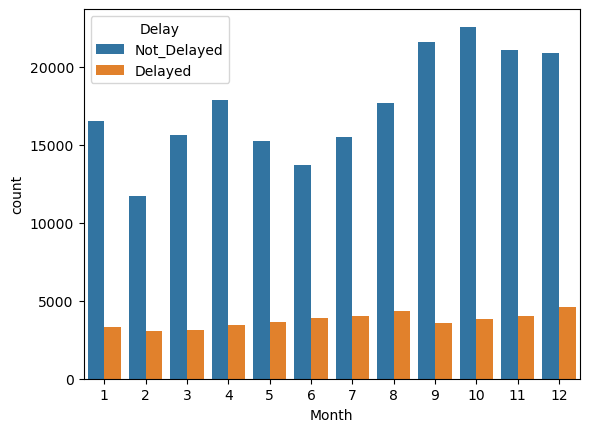

In [35]:
sns.countplot(data=df, x='Month', hue='Delay')

<Axes: xlabel='Month'>

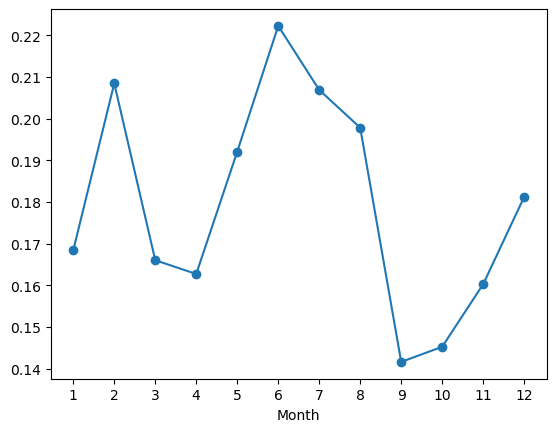

In [36]:
# 달별 지연율 시각화
month = df.groupby('Month')['Delay'].value_counts(normalize=True).to_frame().unstack()
month.columns = ['Delayed_Rate', 'Not_Delayed_Rate']
plt.xticks(range(1, 13))
month['Delayed_Rate'].plot(style='-o')

## 1.8. Day_of_Month

<Axes: xlabel='Day_of_Month', ylabel='count'>

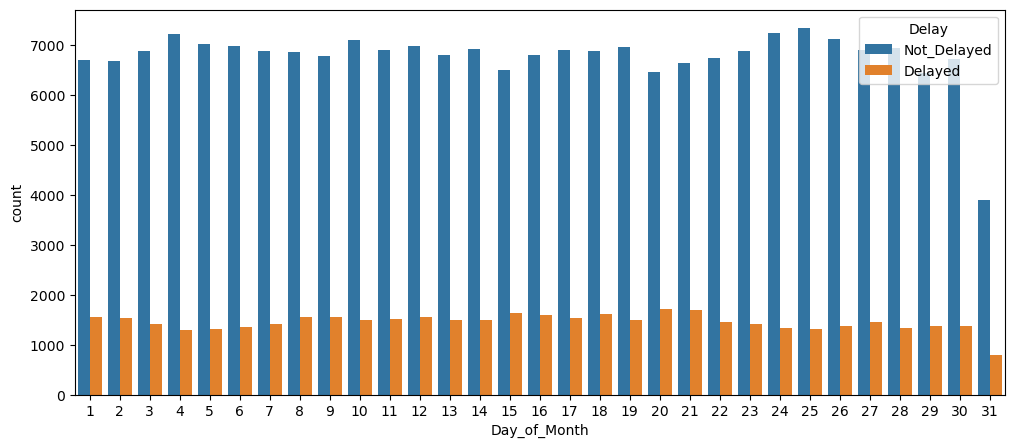

In [37]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Day_of_Month', hue='Delay')

<Axes: xlabel='Day_of_Month'>

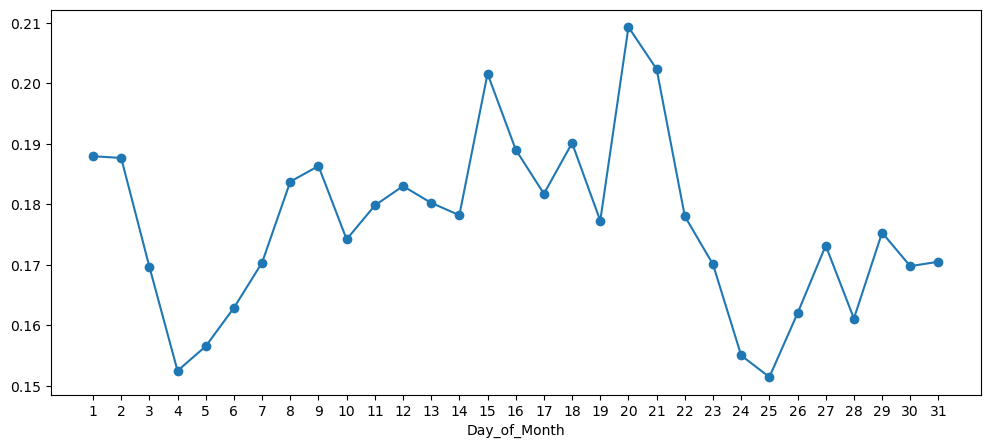

In [38]:
# 일별 지연율 시각화
day = df.groupby('Day_of_Month')['Delay'].value_counts(normalize=True).to_frame().unstack()
day.columns = ['Delayed_Rate', 'Not_Delayed_Rate']
plt.figure(figsize=(12,5))
plt.xticks(range(1, 32))
day['Delayed_Rate'].plot(style='-o')

## 1.9. Estimated_Departure_Time, Estimated_Arrival_Time

<Axes: >

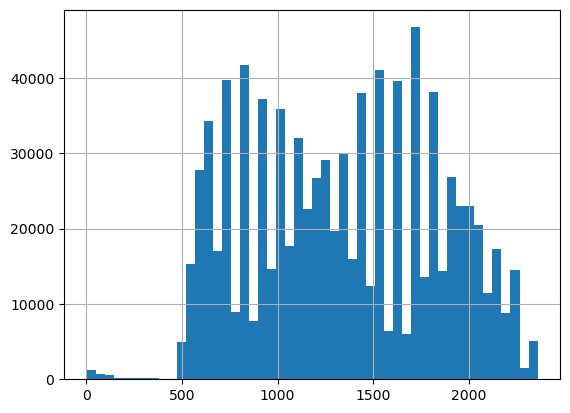

In [39]:
df['Estimated_Departure_Time'].hist(bins=50)

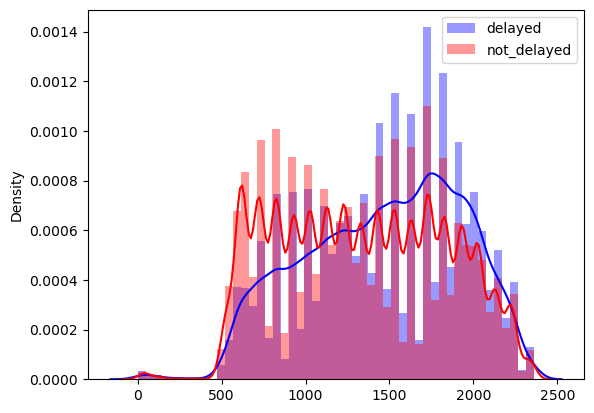

In [40]:
# 출발 시간 별 지연 / 비지연 분포
delay = df['Delay'] == 'Delayed'
not_delay = df['Delay'] != 'Delayed'
sns.distplot(x=df[delay]['Estimated_Departure_Time'], color='Blue', label='delayed')
sns.distplot(x=df[not_delay]['Estimated_Departure_Time'], color='Red', label='not_delayed')
plt.legend()

<Axes: >

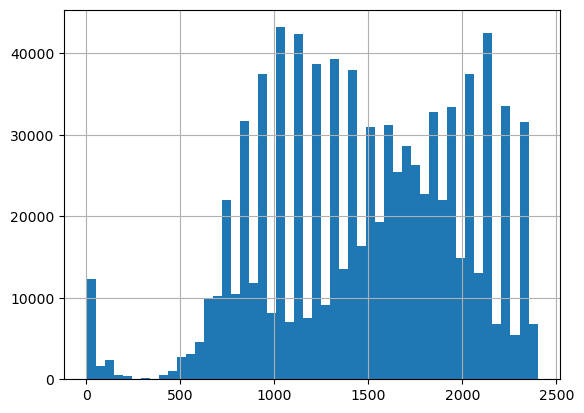

In [41]:
df['Estimated_Arrival_Time'].hist(bins=50)

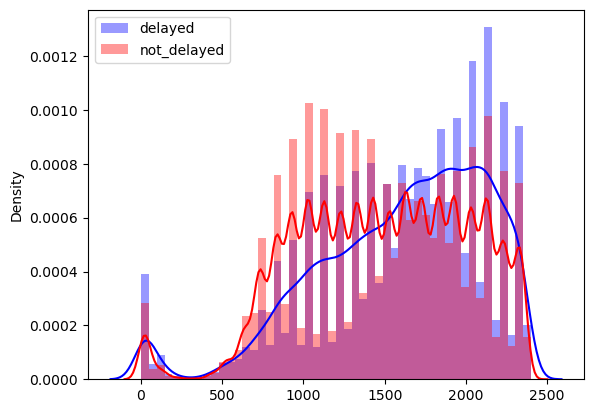

In [42]:
# 도착 시간 별 지연 / 비지연 분포
sns.distplot(x=df[delay]['Estimated_Arrival_Time'], color='Blue', label='delayed')
sns.distplot(x=df[not_delay]['Estimated_Arrival_Time'], color='Red', label='not_delayed')
plt.legend()

## 수치형 변수

## 1.10. Cancelled, Diverted
- 모든 데이터가 0이기 때문에 두 컬럼 모두 삭제 예정

In [43]:
print(df['Cancelled'].value_counts())
print(df['Diverted'].value_counts())

0    1000000
Name: Cancelled, dtype: int64
0    1000000
Name: Diverted, dtype: int64


## 1.11. Distance 

<Axes: >

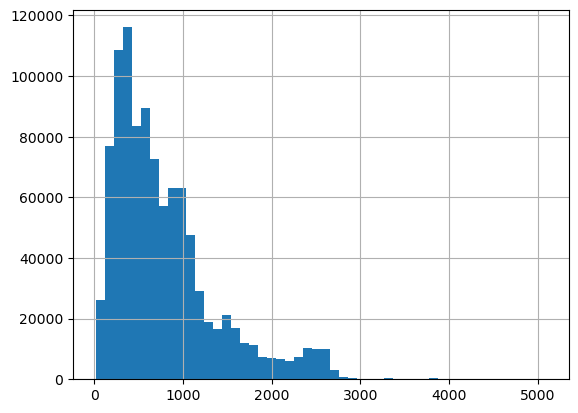

In [44]:
df['Distance'].hist(bins=50)

In [45]:
# 출발지 - 도착지별 Distance
df['O_D_Airport'] = df['Origin_Airport'] + '-' + df['Destination_Airport']
df['D_O_Airport'] = df['Destination_Airport'] + '-' + df['Origin_Airport']


In [46]:
result = df.groupby('O_D_Airport')['Distance'].unique()

# 개수가 1보다 큰 것 필터링
result[result.apply(lambda x : len(x) > 1)]

O_D_Airport
ABE-ORD      [654.0, 655.0]
ATW-ORD      [161.0, 160.0]
AZA-DSM    [1137.0, 1138.0]
BHM-ORD      [584.0, 583.0]
BIL-ORD    [1061.0, 1060.0]
BUF-ORD      [474.0, 473.0]
BWI-ORD      [622.0, 621.0]
BZN-ORD    [1185.0, 1186.0]
CGI-ORD      [339.0, 340.0]
CHA-ORD      [501.0, 500.0]
CLE-ORD      [316.0, 315.0]
CRW-PHL      [356.0, 357.0]
DAL-MCI      [460.0, 461.0]
DAL-OMA      [586.0, 585.0]
DAL-SAT      [247.0, 248.0]
DAL-TUL      [237.0, 238.0]
DEN-DRO      [250.0, 251.0]
DFW-ORD      [801.0, 802.0]
DRO-DEN      [250.0, 251.0]
DRO-PHX      [353.0, 351.0]
DSM-AZA    [1138.0, 1137.0]
DSM-DTW      [533.0, 534.0]
DSM-PHX    [1149.0, 1150.0]
DTW-DSM      [534.0, 533.0]
EYW-MIA      [126.0, 125.0]
FSD-ORD      [463.0, 462.0]
GRB-ORD      [174.0, 173.0]
GSP-SFB      [425.0, 426.0]
GTF-ORD    [1211.0, 1210.0]
LAS-TUS      [365.0, 364.0]
MCI-DAL      [461.0, 460.0]
MIA-EYW      [126.0, 125.0]
MKG-ORD      [119.0, 118.0]
MSN-ORD      [108.0, 109.0]
MSY-ORD      [836.0, 837.0]
OMA-DAL 

In [47]:
result = df.groupby('D_O_Airport')['Distance'].unique()

# 개수가 1보다 큰 것 필터링
result[result.apply(lambda x : len(x) > 1)]

D_O_Airport
ABE-ORD      [654.0, 655.0]
ATW-ORD      [160.0, 161.0]
AZA-DSM    [1138.0, 1137.0]
BHM-ORD      [583.0, 584.0]
BIL-ORD    [1060.0, 1061.0]
BUF-ORD      [473.0, 474.0]
BWI-ORD      [622.0, 621.0]
BZN-ORD    [1185.0, 1186.0]
CGI-ORD      [339.0, 340.0]
CHA-ORD      [500.0, 501.0]
CLE-ORD      [315.0, 316.0]
CRW-PHL      [357.0, 356.0]
DAL-MCI      [461.0, 460.0]
DAL-OMA      [586.0, 585.0]
DAL-SAT      [247.0, 248.0]
DAL-TUL      [238.0, 237.0]
DEN-DRO      [250.0, 251.0]
DFW-ORD      [802.0, 801.0]
DRO-DEN      [250.0, 251.0]
DRO-PHX      [353.0, 351.0]
DSM-AZA    [1137.0, 1138.0]
DSM-DTW      [534.0, 533.0]
DSM-PHX    [1149.0, 1150.0]
DTW-DSM      [533.0, 534.0]
EYW-MIA      [126.0, 125.0]
FSD-ORD      [463.0, 462.0]
GRB-ORD      [174.0, 173.0]
GSP-SFB      [426.0, 425.0]
GTF-ORD    [1211.0, 1210.0]
LAS-TUS      [365.0, 364.0]
MCI-DAL      [460.0, 461.0]
MIA-EYW      [126.0, 125.0]
MKG-ORD      [118.0, 119.0]
MSN-ORD      [108.0, 109.0]
MSY-ORD      [836.0, 837.0]
OMA-DAL 